In [1]:
# P. Barry Seavey
# PRED 454-55, Winter 2018
# project 2
# kaggle.com 'Facial Keypoints Detection'

In [2]:
# --- EDA ---

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import os
print(os.listdir('../Facial Keypoints'))

['.ipynb_checkpoints', '15_pt_1.PNG', '4 Traditional White with Purple.pptx', '4_pt_1.PNG', 'clean-white-brick-wall-textures-plain-820x532.jpg', 'CNN2_128-500-500-30_augmentdata.h5', 'CNN2_128-500-500-30_dropout.h5', 'CNN2_128-500-500-30_v1.h5', 'CNN_500-90-30_v2.h5', 'CNN_500-90-30_v5.h5', 'df_dump.PNG', 'face_model.h5', 'Fac_Kpt_1stCNNModel.ipynb', 'Fac_Kpt_1stModel.ipynb', 'Fac_Kpt_CNN-m2-flipnonull.ipynb', 'Fac_Kpt_CNN-model2-augmentdata.ipynb', 'Fac_Kpt_CNN-num2-dropout.ipynb', 'Fac_Kpt_CNN-num2.ipynb', 'Fac_Kpt_EDA1.ipynb', 'Fac_Kpt_img-extraction.ipynb', 'Fac_Kpt_nullpredict.ipynb', 'FKPt - imputedata1.ipynb', 'FKPt_CNN-batchnorm.ipynb', 'FKPt_CNN-m2-ensemble_augdata.ipynb', 'IdLookupTable.csv', 'imgs', 'KPT_500-90-30.h5', 'model2_augmentdata.csv', 'model2_flipnonull.csv', 'model2_v1.csv', 'model2_withdrop.csv', 'nigel.jpg', 'pic1.png', 'SampleSubmission.csv', 'Screen_Caps', 'Seavey_base_500-90-30_v2.csv', 'Seavey_base_500-90-30_v3.csv', 'Seavey_base_500-90-30_v4.csv', 'Seavey_f

In [5]:
#

In [7]:
  
df = pd.read_csv('training.csv')

    # The Image column has pixel values separated by space; convert to numpy arrays:
    
df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep = ' '))

X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
X = X.astype(np.float32)

y = df[df.columns[:-1]].values
y = (y - 48) / 48  # scale target coordinates to [-1, 1]
y = y.astype(np.float32)

In [8]:
df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [8]:
#df=df.iloc[:, :-1]

In [9]:
df.head(3)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 239..."
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,"[219.0, 215.0, 204.0, 196.0, 204.0, 211.0, 212..."
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,"[144.0, 142.0, 159.0, 180.0, 188.0, 188.0, 184..."


In [14]:
df.Image.head(5)

0    [238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 239...
1    [219.0, 215.0, 204.0, 196.0, 204.0, 211.0, 212...
2    [144.0, 142.0, 159.0, 180.0, 188.0, 188.0, 184...
3    [193.0, 192.0, 193.0, 194.0, 194.0, 194.0, 193...
4    [147.0, 148.0, 160.0, 196.0, 215.0, 214.0, 216...
Name: Image, dtype: object

In [10]:
X

array([[ 0.93333334,  0.9254902 ,  0.92941177, ...,  0.27450982,
         0.29411766,  0.35294119],
       [ 0.85882354,  0.84313726,  0.80000001, ...,  0.00392157,
         0.00392157,  0.00392157],
       [ 0.56470591,  0.55686277,  0.62352943, ...,  0.30588236,
         0.30588236,  0.3019608 ],
       ..., 
       [ 0.29019609,  0.29019609,  0.29019609, ...,  0.07843138,
         0.07843138,  0.07843138],
       [ 0.99607843,  0.99607843,  0.99607843, ...,  0.99607843,
         0.99607843,  0.99607843],
       [ 0.20784314,  0.24313726,  0.26274511, ...,  0.61960787,
         0.61960787,  0.62352943]], dtype=float32)

In [10]:
df.count()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [11]:
df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [12]:
df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [13]:
num_keypoints = df.shape[1]

In [14]:
num_keypoints

30

In [15]:
num_available_keypoints = num_keypoints - df.isnull().sum(axis=1)

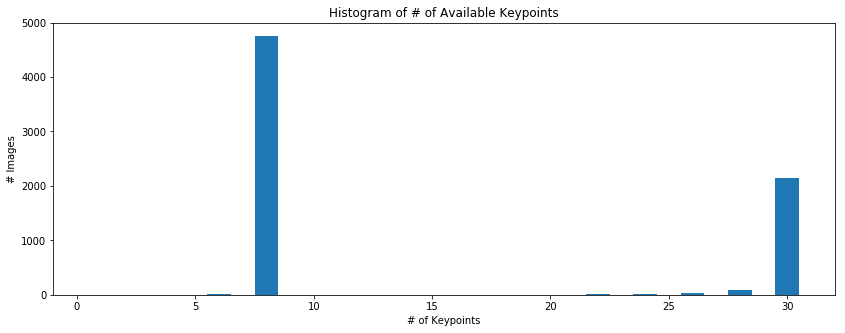

In [16]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14,5))
ax.hist(num_available_keypoints,bins=0.5+np.arange(num_keypoints+1))
ax.set_title('Histogram of # of Available Keypoints')
ax.set_xlabel('# of Keypoints'); ax.set_ylabel('# Images');

In [17]:
fraction_present_keypoints = 1.0 - df.iloc[:,0::2].isnull().mean(axis=0)
fraction_present_keypoints

left_eye_center_x            0.998581
right_eye_center_x           0.998156
left_eye_inner_corner_x      0.322173
left_eye_outer_corner_x      0.321606
right_eye_inner_corner_x     0.321748
right_eye_outer_corner_x     0.321748
left_eyebrow_inner_end_x     0.322031
left_eyebrow_outer_end_x     0.315648
right_eyebrow_inner_end_x    0.322031
right_eyebrow_outer_end_x    0.317208
nose_tip_x                   1.000000
mouth_left_corner_x          0.321890
mouth_right_corner_x         0.322031
mouth_center_top_lip_x       0.322741
mouth_center_bottom_lip_x    0.995318
dtype: float64

In [18]:
def plt_sample(num):
    img = X[num].reshape(96, 96)
    #
    plt.imshow(img, cmap='gray')
    plt.scatter(y[num][0::2] * 48 + 48, y[num][1::2] * 48 + 48, marker='x', s=10, color='red')
    plt.title("Image=%d" %(num))

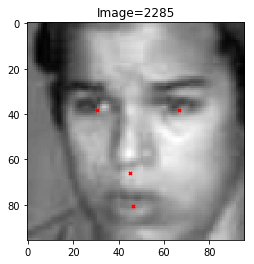

In [19]:
plt_sample(2285)

In [20]:
df[df.index==2285]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
2285,66.534784,38.207872,30.261888,38.207872,NaN,NaN,NaN,NaN,NaN,NaN,...,44.943744,65.84448,NaN,NaN,NaN,NaN,NaN,NaN,46.239232,80.526336


In [27]:
keypointColors = {}
keypointColors['left_eye_center'] = 'orange'
keypointColors['right_eye_center'] = 'green'
#keypointColors['nose_tip'] = 'red'
#keypointColors['mouth_center_bottom_lip'] = 'blue'

In [24]:
num_images=X.shape[0]

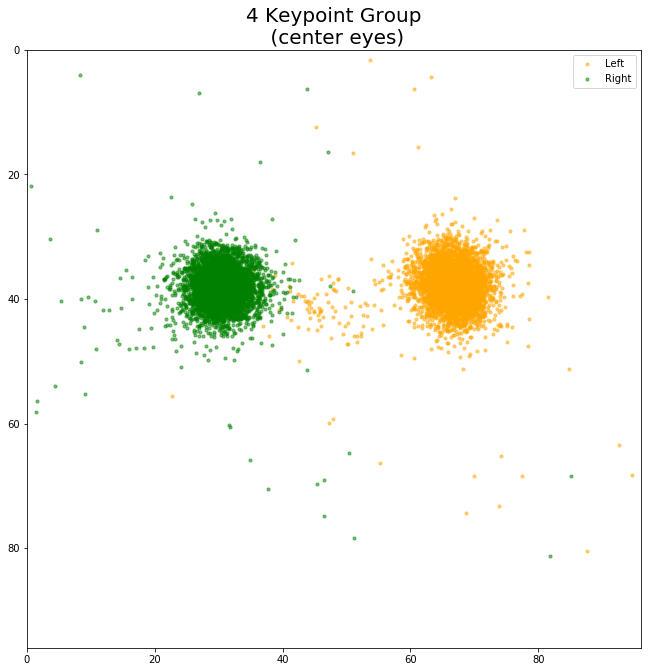

In [30]:
keypoint_present_inds = np.ones(num_images) == 1
for key in keypointColors.keys():
    keypoint_present_inds = keypoint_present_inds & (df.isnull()[key+'_x'] == False)
keypoint_present_inds = np.nonzero(keypoint_present_inds)[0]

plt.figure(figsize=(11,11))
for key,value in keypointColors.items():
    x_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_x'].tolist())
    y_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_y'].tolist())
    plt.scatter(x_feature_coords,y_feature_coords,c=value,s=10,alpha=0.5)
plt.xlim(0,96); plt.ylim(96,0)
plt.title('4 Keypoint Group\n (center eyes)', fontsize=20)
plt.legend(['Left','Right']);

In [120]:
check=df.loc[df.right_eye_center_y>70]

In [121]:
check

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
2453,73.791763,73.241126,51.097244,78.374400,NaN,NaN,NaN,NaN,NaN,NaN,...,68.118163,95.935644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3447,69.898986,68.466507,37.786887,70.494641,NaN,NaN,NaN,NaN,NaN,NaN,...,54.349955,93.818227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4482,68.710953,74.295360,46.414429,74.796393,NaN,NaN,NaN,NaN,NaN,NaN,...,58.940509,88.825658,NaN,NaN,NaN,NaN,NaN,NaN,58.811171,93.084567
6493,87.632610,80.502649,81.827823,81.270911,NaN,NaN,NaN,NaN,NaN,NaN,...,84.730235,86.136728,NaN,NaN,NaN,NaN,NaN,NaN,85.583851,88.014742


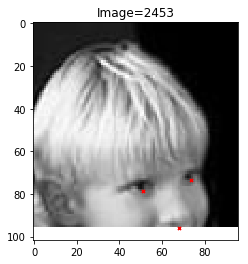

In [58]:
plt_sample(2453)

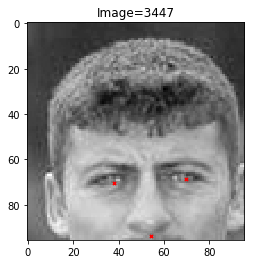

In [122]:
plt_sample(3447)

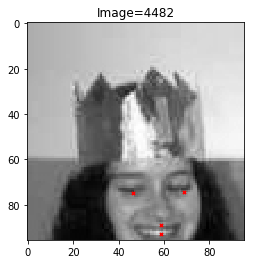

In [59]:
plt_sample(4482)

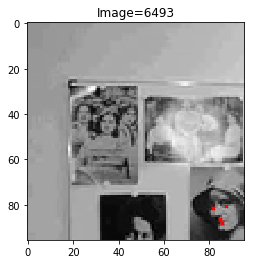

In [60]:
plt_sample(6493)

In [23]:
badpics=[]

In [24]:
badpics.extend([2453, 3447, 6493])

In [25]:
badpics

[2453, 3447, 6493]

In [26]:
check=df.loc[df.left_eye_center_y>70]

In [27]:
check

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
2453,73.791763,73.241126,51.097244,78.374400,NaN,NaN,NaN,NaN,NaN,NaN,...,68.118163,95.935644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4482,68.710953,74.295360,46.414429,74.796393,NaN,NaN,NaN,NaN,NaN,NaN,...,58.940509,88.825658,NaN,NaN,NaN,NaN,NaN,NaN,58.811171,93.084567
6493,87.632610,80.502649,81.827823,81.270911,NaN,NaN,NaN,NaN,NaN,NaN,...,84.730235,86.136728,NaN,NaN,NaN,NaN,NaN,NaN,85.583851,88.014742


In [28]:
# duplicates from above

In [29]:
check=df.loc[df.left_eye_center_y<25]

In [30]:
check

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
1260,66.962355,23.832996,25.871819,24.773072,56.891411,27.190098,80.525162,26.250023,36.48,26.250023,...,47.030581,53.416211,63.850868,71.145781,30.397947,71.595713,47.939502,66.599728,47.484860,78.419683
3510,60.602609,6.281510,43.861506,6.281510,NaN,NaN,NaN,NaN,NaN,NaN,...,51.779594,17.932414,NaN,NaN,NaN,NaN,NaN,NaN,52.232057,25.850503
3647,45.258048,12.372672,0.686592,21.811392,NaN,NaN,NaN,NaN,NaN,NaN,...,23.234496,34.920768,NaN,NaN,NaN,NaN,NaN,NaN,26.380800,49.603008
4786,63.220517,4.424431,26.912738,6.891951,NaN,NaN,NaN,NaN,NaN,NaN,...,46.300394,36.502178,NaN,NaN,NaN,NaN,NaN,NaN,48.767914,48.134769
5117,50.995973,16.640737,36.418573,17.986334,NaN,NaN,NaN,NaN,NaN,NaN,...,44.492199,28.526896,NaN,NaN,NaN,NaN,NaN,NaN,44.716478,34.582112
6765,61.230021,15.633185,47.029641,16.361363,NaN,NaN,NaN,NaN,NaN,NaN,...,54.675994,26.374519,NaN,NaN,NaN,NaN,NaN,NaN,55.222163,31.107911
6782,53.640960,1.616512,8.387840,4.091264,NaN,NaN,NaN,NaN,NaN,NaN,...,31.014400,34.849024,NaN,NaN,NaN,NaN,NaN,NaN,33.488640,55.354112


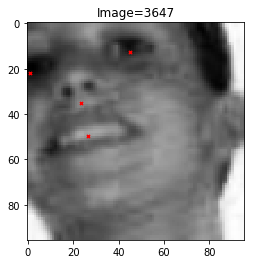

In [69]:
plt_sample(3647)

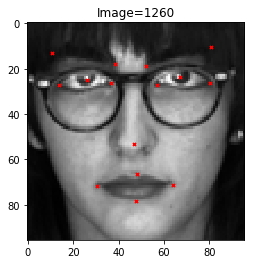

In [135]:
plt_sample(1260)

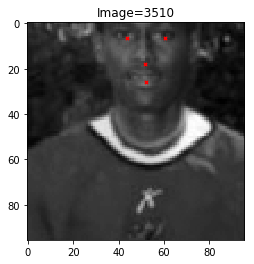

In [136]:
plt_sample(3510)

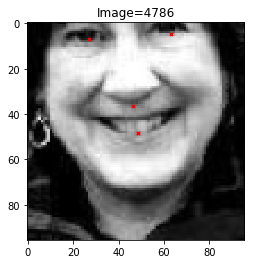

In [137]:
plt_sample(4786)

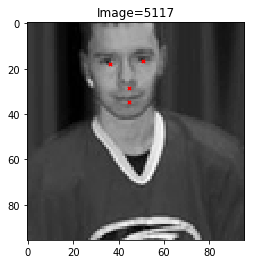

In [138]:
plt_sample(5117)

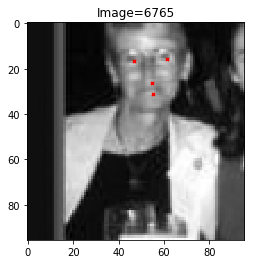

In [139]:
plt_sample(6765)

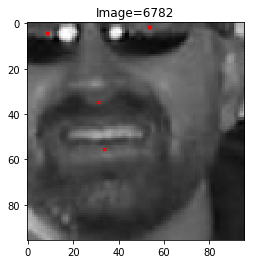

In [140]:
plt_sample(6782)

In [ ]:
# --- add to drop list here ---

In [31]:
check=df.loc[df.right_eye_center_y<25]

In [32]:
check

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
1260,66.962355,23.832996,25.871819,24.773072,56.891411,27.190098,80.525162,26.250023,36.48,26.250023,...,47.030581,53.416211,63.850868,71.145781,30.397947,71.595713,47.939502,66.599728,47.484860,78.419683
3179,71.168218,38.916291,22.613236,23.683345,NaN,NaN,NaN,NaN,NaN,NaN,...,30.864436,68.747418,NaN,NaN,NaN,NaN,NaN,NaN,30.547055,91.279418
3510,60.602609,6.281510,43.861506,6.281510,NaN,NaN,NaN,NaN,NaN,NaN,...,51.779594,17.932414,NaN,NaN,NaN,NaN,NaN,NaN,52.232057,25.850503
3647,45.258048,12.372672,0.686592,21.811392,NaN,NaN,NaN,NaN,NaN,NaN,...,23.234496,34.920768,NaN,NaN,NaN,NaN,NaN,NaN,26.380800,49.603008
4786,63.220517,4.424431,26.912738,6.891951,NaN,NaN,NaN,NaN,NaN,NaN,...,46.300394,36.502178,NaN,NaN,NaN,NaN,NaN,NaN,48.767914,48.134769
5117,50.995973,16.640737,36.418573,17.986334,NaN,NaN,NaN,NaN,NaN,NaN,...,44.492199,28.526896,NaN,NaN,NaN,NaN,NaN,NaN,44.716478,34.582112
6765,61.230021,15.633185,47.029641,16.361363,NaN,NaN,NaN,NaN,NaN,NaN,...,54.675994,26.374519,NaN,NaN,NaN,NaN,NaN,NaN,55.222163,31.107911
6782,53.640960,1.616512,8.387840,4.091264,NaN,NaN,NaN,NaN,NaN,NaN,...,31.014400,34.849024,NaN,NaN,NaN,NaN,NaN,NaN,33.488640,55.354112


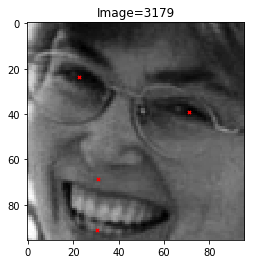

In [33]:
plt_sample(3179)

In [ ]:
#

In [36]:
check=df.loc[df.right_eye_center_x<10]

In [37]:
check

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
1747,75.007892,33.742815,8.472983,40.022514,61.682968,40.396306,91.515526,35.143287,23.025937,44.258819,...,47.351880,87.587970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1907,22.763345,55.617202,1.528527,56.404973,19.064954,56.291237,27.571879,56.384378,5.751046,56.743904,...,12.944699,60.069687,22.923362,73.483945,2.245766,74.128316,12.605173,71.888816,12.536477,76.628863
2533,39.455086,41.691396,9.641790,39.645385,NaN,NaN,NaN,NaN,NaN,NaN,...,24.256154,64.197517,NaN,NaN,NaN,NaN,NaN,NaN,24.548438,71.796943
2700,40.658697,42.969390,8.507871,50.138157,NaN,NaN,NaN,NaN,NaN,NaN,...,25.886702,75.337456,NaN,NaN,NaN,NaN,NaN,NaN,31.647198,87.502652
3173,41.233512,38.741852,1.379112,58.115507,NaN,NaN,NaN,NaN,NaN,NaN,...,35.421436,84.961907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3374,41.242587,43.358676,9.150044,55.322160,NaN,NaN,NaN,NaN,NaN,NaN,...,22.442818,74.691627,NaN,NaN,NaN,NaN,NaN,NaN,26.240747,91.972267
3647,45.258048,12.372672,0.686592,21.811392,NaN,NaN,NaN,NaN,NaN,NaN,...,23.234496,34.920768,NaN,NaN,NaN,NaN,NaN,NaN,26.380800,49.603008
3888,38.334186,38.398812,8.927307,44.570623,NaN,NaN,NaN,NaN,NaN,NaN,...,24.538392,64.901245,NaN,NaN,NaN,NaN,NaN,NaN,27.079720,74.703538
4180,45.452994,44.903011,4.449067,54.015001,NaN,NaN,NaN,NaN,NaN,NaN,...,29.760097,80.591612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6271,43.561870,40.326273,5.394240,40.326273,NaN,NaN,NaN,NaN,NaN,NaN,...,19.871619,70.597241,NaN,NaN,NaN,NaN,NaN,NaN,19.871619,87.970097


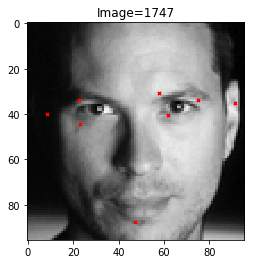

In [38]:
plt_sample(1747)

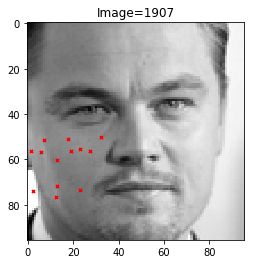

In [39]:
plt_sample(1907)

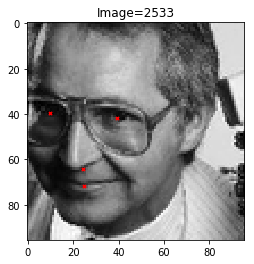

In [40]:
plt_sample(2533)

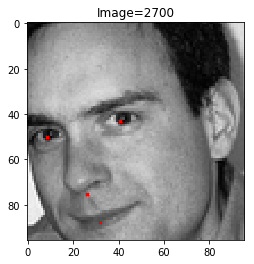

In [41]:
plt_sample(2700)

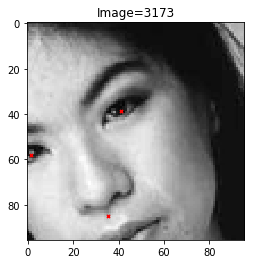

In [42]:
plt_sample(3173)

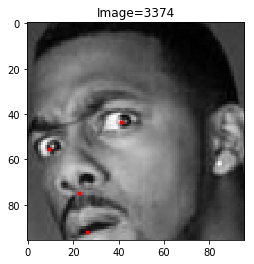

In [43]:
plt_sample(3374)

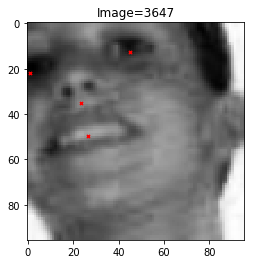

In [44]:
plt_sample(3647)

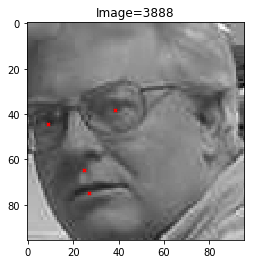

In [45]:
plt_sample(3888)

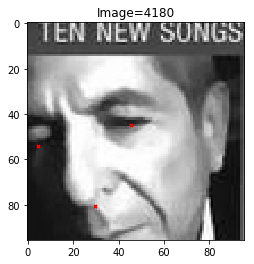

In [46]:
plt_sample(4180)

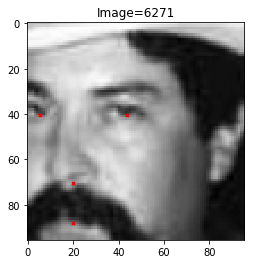

In [47]:
plt_sample(6271)

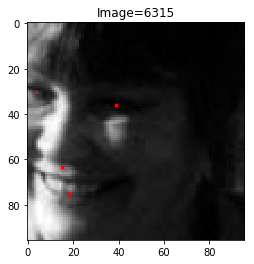

In [48]:
plt_sample(6315)

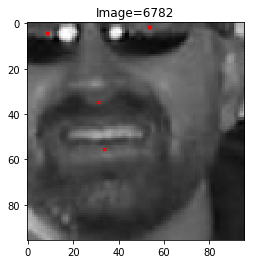

In [49]:
plt_sample(6782)

In [52]:
check.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
1747,75.007892,33.742815,8.472983,40.022514,61.682968,40.396306,91.515526,35.143287,23.025937,44.258819,...,47.351880,87.587970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1907,22.763345,55.617202,1.528527,56.404973,19.064954,56.291237,27.571879,56.384378,5.751046,56.743904,...,12.944699,60.069687,22.923362,73.483945,2.245766,74.128316,12.605173,71.888816,12.536477,76.628863
2533,39.455086,41.691396,9.641790,39.645385,NaN,NaN,NaN,NaN,NaN,NaN,...,24.256154,64.197517,NaN,NaN,NaN,NaN,NaN,NaN,24.548438,71.796943
2700,40.658697,42.969390,8.507871,50.138157,NaN,NaN,NaN,NaN,NaN,NaN,...,25.886702,75.337456,NaN,NaN,NaN,NaN,NaN,NaN,31.647198,87.502652
3173,41.233512,38.741852,1.379112,58.115507,NaN,NaN,NaN,NaN,NaN,NaN,...,35.421436,84.961907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
check.index

Int64Index([1747, 1907, 2533, 2700, 3173, 3374, 3647, 3888, 4180, 6271, 6315,
            6782],
           dtype='int64')

In [59]:
check=df.loc[df.left_eye_center_x>80]

In [60]:
check

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
1877,92.622962,63.511878,50.414861,64.779932,84.440991,65.081850,NaN,NaN,58.596832,65.897028,...,68.315455,92.738058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2199,84.829417,51.249251,43.896125,51.369466,77.556395,52.241026,95.25809,51.279304,55.526950,52.301134,...,75.721851,74.891091,83.31425,93.806637,44.283815,95.510678,67.701863,94.548359,NaN,NaN
4263,94.689280,68.189472,85.039381,68.473291,NaN,NaN,NaN,NaN,NaN,NaN,...,89.438592,75.284992,NaN,NaN,NaN,NaN,NaN,NaN,89.438592,78.548928
6493,87.632610,80.502649,81.827823,81.270911,NaN,NaN,NaN,NaN,NaN,NaN,...,84.730235,86.136728,NaN,NaN,NaN,NaN,NaN,NaN,85.583851,88.014742
6585,81.442830,39.650299,29.967657,39.650299,NaN,NaN,NaN,NaN,NaN,NaN,...,50.557724,88.456428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


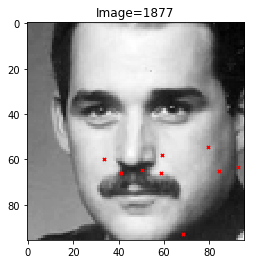

In [61]:
plt_sample(1877)

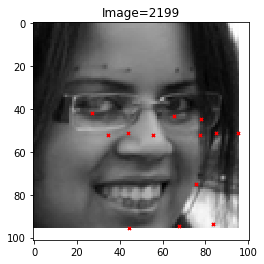

In [62]:
plt_sample(2199)

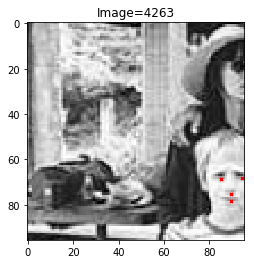

In [63]:
plt_sample(4263)

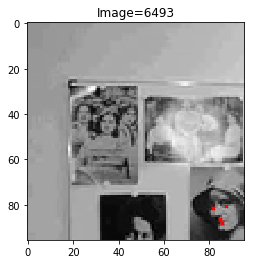

In [64]:
plt_sample(6493)

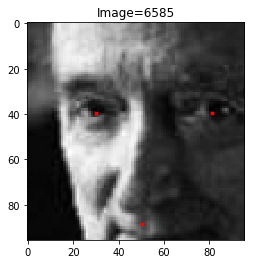

In [65]:
plt_sample(6585)

In [ ]:
#

In [81]:
keypointColors = {}
#keypointColors['left_eye_center'] = 'yellow'
#keypointColors['right_eye_center'] = 'green'
keypointColors['nose_tip'] = 'red'
#keypointColors['mouth_center_bottom_lip'] = 'blue'

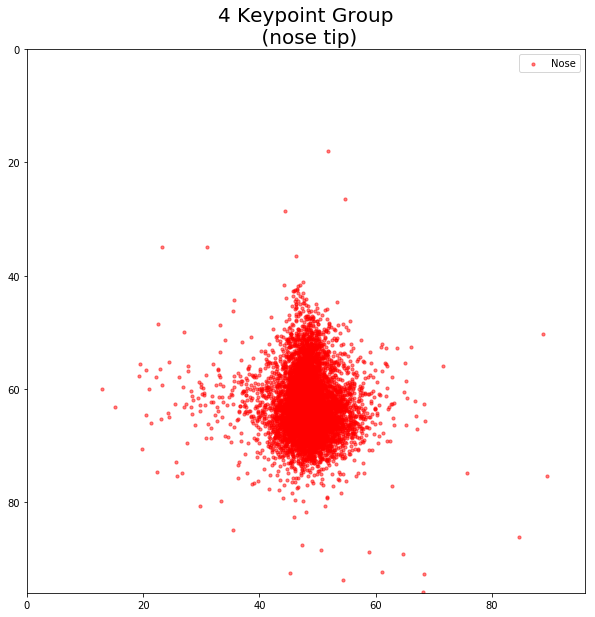

In [96]:
keypoint_present_inds = np.ones(num_images) == 1
for key in keypointColors.keys():
    keypoint_present_inds = keypoint_present_inds & (df.isnull()[key+'_x'] == False)
keypoint_present_inds = np.nonzero(keypoint_present_inds)[0]

plt.figure(figsize=(10,10))
for key,value in keypointColors.items():
    x_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_x'].tolist())
    y_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_y'].tolist())
    plt.scatter(x_feature_coords,y_feature_coords,c=value,s=10,alpha=0.5)
plt.xlim(0,96); plt.ylim(96,0)
plt.title('4 Keypoint Group\n (nose tip)', fontsize=20)
plt.legend(['Nose Tip', 'Bottom Lip']);

In [72]:
check=df.loc[df.nose_tip_y>80]

In [73]:
check

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
1747,75.007892,33.742815,8.472983,40.022514,61.682968,40.396306,91.515526,35.143287,23.025937,44.258819,...,47.351880,87.587970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1877,92.622962,63.511878,50.414861,64.779932,84.440991,65.081850,NaN,NaN,58.596832,65.897028,...,68.315455,92.738058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,74.210171,65.195720,45.424104,69.718677,69.020452,66.562559,79.452855,64.618230,50.781688,69.808803,...,64.716334,89.184617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2289,68.541200,40.328431,10.666246,40.328431,NaN,NaN,NaN,NaN,NaN,NaN,...,45.296338,92.510769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2453,73.791763,73.241126,51.097244,78.374400,NaN,NaN,NaN,NaN,NaN,NaN,...,68.118163,95.935644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2562,55.310992,66.335122,34.918080,65.927265,NaN,NaN,NaN,NaN,NaN,NaN,...,45.930260,82.649443,NaN,NaN,NaN,NaN,NaN,NaN,46.338117,88.767319
3173,41.233512,38.741852,1.379112,58.115507,NaN,NaN,NaN,NaN,NaN,NaN,...,35.421436,84.961907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3296,77.451863,68.475676,46.414829,69.053994,NaN,NaN,NaN,NaN,NaN,NaN,...,61.065834,92.379910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3447,69.898986,68.466507,37.786887,70.494641,NaN,NaN,NaN,NaN,NaN,NaN,...,54.349955,93.818227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3697,74.218049,39.044636,27.979245,41.337510,NaN,NaN,NaN,NaN,NaN,NaN,...,51.289750,80.697779,NaN,NaN,NaN,NaN,NaN,NaN,53.964650,90.633421


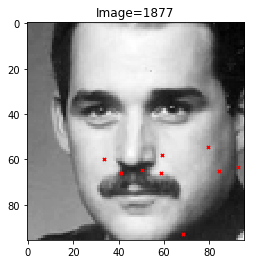

In [79]:
plt_sample(1877)

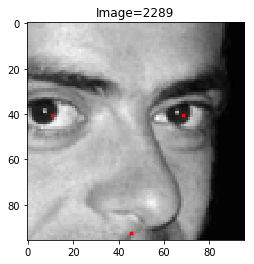

In [91]:
plt_sample(2289)

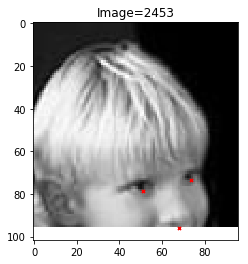

In [92]:
plt_sample(2453)

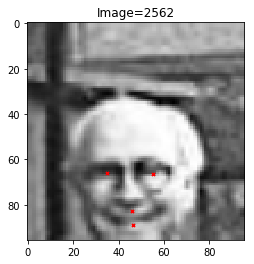

In [93]:
plt_sample(2562)

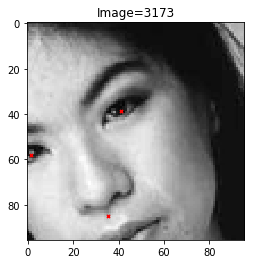

In [94]:
plt_sample(3173)

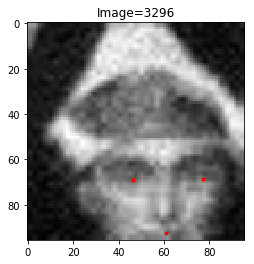

In [95]:
plt_sample(3296)

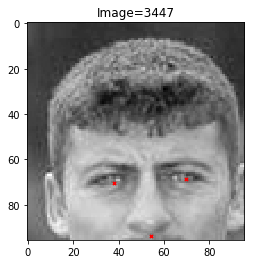

In [97]:
plt_sample(3447)

In [124]:
piclist = np.array(check.index.tolist())

In [126]:
piclist[1]

1877

In [ ]:
# --- subplots?? ---

In [31]:
keypointColors = {}
keypointColors['left_eye_center'] = 'yellow'
keypointColors['right_eye_center'] = 'green'
keypointColors['nose_tip'] = 'red'
keypointColors['mouth_center_bottom_lip'] = 'blue'

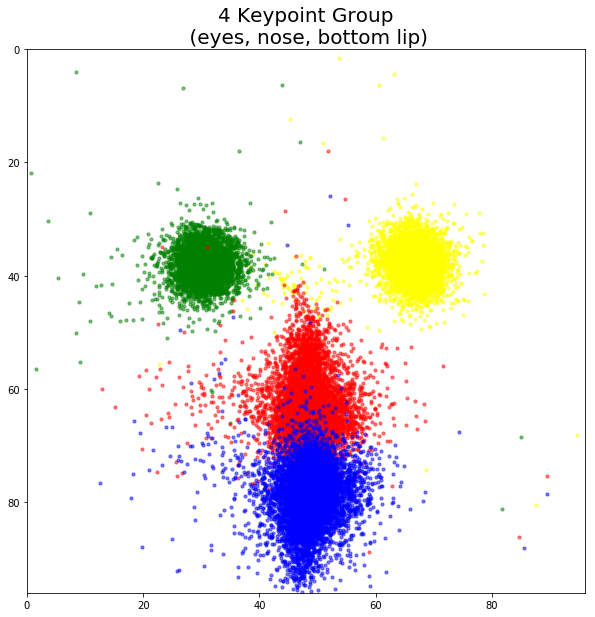

In [32]:
keypoint_present_inds = np.ones(num_images) == 1
for key in keypointColors.keys():
    keypoint_present_inds = keypoint_present_inds & (df.isnull()[key+'_x'] == False)
keypoint_present_inds = np.nonzero(keypoint_present_inds)[0]

plt.figure(figsize=(10,10))
for key,value in keypointColors.items():
    x_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_x'].tolist())
    y_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_y'].tolist())
    plt.scatter(x_feature_coords,y_feature_coords,c=value,s=10,alpha=0.5)
plt.xlim(0,96); plt.ylim(96,0)
plt.title('4 Keypoint Group\n (eyes, nose, bottom lip)', fontsize=20);

In [ ]:
# --- 15 point group ---

In [33]:
keypointColors = {}
keypointColors['left_eye_center'] = 'orange'
keypointColors['left_eye_inner_corner'] = 'green'
keypointColors['left_eye_outer_corner'] = 'blue'
"""keypointColors['left_eyebrow_inner_end'] = 'brown'
keypointColors['left_eyebrow_outer_end'] = 'brown'

keypointColors['right_eye_center'] = 'green'
keypointColors['right_eye_inner_corner'] = 'lime'
keypointColors['right_eye_outer_corner'] = 'lime'
keypointColors['right_eyebrow_inner_end'] = 'chocolate'
keypointColors['right_eyebrow_outer_end'] = 'chocolate'

keypointColors['nose_tip'] = 'red'

keypointColors['mouth_left_corner']       = 'cyan'
keypointColors['mouth_right_corner']      = 'cyan'
keypointColors['mouth_center_top_lip']    = 'blue'
keypointColors['mouth_center_bottom_lip'] = 'blue'"""

"keypointColors['left_eyebrow_inner_end'] = 'brown'\nkeypointColors['left_eyebrow_outer_end'] = 'brown'\n\nkeypointColors['right_eye_center'] = 'green'\nkeypointColors['right_eye_inner_corner'] = 'lime'\nkeypointColors['right_eye_outer_corner'] = 'lime'\nkeypointColors['right_eyebrow_inner_end'] = 'chocolate'\nkeypointColors['right_eyebrow_outer_end'] = 'chocolate'\n\nkeypointColors['nose_tip'] = 'red'\n\nkeypointColors['mouth_left_corner']       = 'cyan'\nkeypointColors['mouth_right_corner']      = 'cyan'\nkeypointColors['mouth_center_top_lip']    = 'blue'\nkeypointColors['mouth_center_bottom_lip'] = 'blue'"

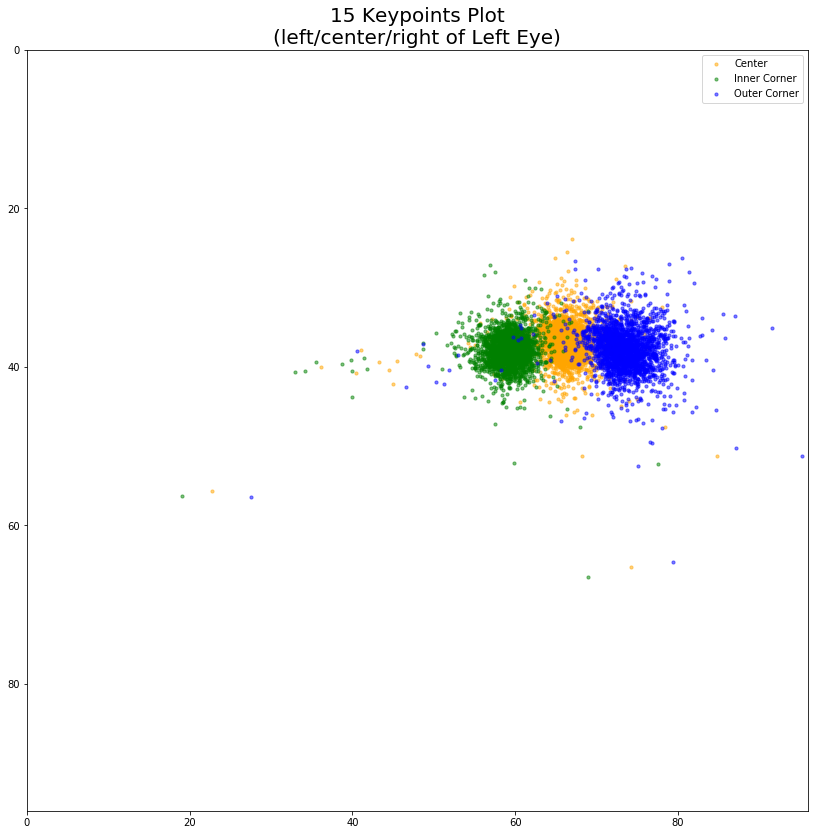

In [36]:
keypoint_present_inds = np.ones(num_images) == 1
for key in keypointColors.keys():
    keypoint_present_inds = keypoint_present_inds & (df.isnull()[key+'_x'] == False)
keypoint_present_inds = np.nonzero(keypoint_present_inds)[0]

plt.figure(figsize=(14,14))
for key,value in keypointColors.items():
    x_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_x'].tolist())
    y_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_y'].tolist())
    plt.scatter(x_feature_coords,y_feature_coords,c=value,s=10,alpha=0.5)
plt.xlim(0,96); plt.ylim(96,0)
plt.title('15 Keypoints Data\n(inner/center/outer of Left Eye)', fontsize=20);
plt.legend(['Center', 'Inner Corner', 'Outer Corner']);

In [37]:
check=df.loc[df.left_eye_inner_corner_x<40]

In [38]:
check

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
1620,40.458999,40.761635,NaN,NaN,35.552085,39.437385,46.618306,42.578631,NaN,NaN,...,19.534175,55.672760,NaN,NaN,NaN,NaN,29.324415,66.698519,29.324415,72.600096
1652,43.312994,39.441219,20.132056,39.410208,38.696963,39.654267,49.344689,39.828861,NaN,NaN,...,19.219701,57.654087,42.073749,70.457936,19.297439,67.656085,26.056623,71.419578,25.943341,72.577576
1723,44.968689,42.166964,22.807149,45.109872,39.920950,43.806664,50.292282,41.909337,26.907860,45.645690,...,27.361236,62.594258,46.154825,72.235213,28.565946,74.795360,35.667474,73.891110,35.910988,74.816465
1861,36.165660,39.993905,23.196134,43.814740,34.140979,40.558028,40.609707,38.052049,25.041023,43.778630,...,21.358367,66.084898,37.145469,78.111347,NaN,NaN,29.675755,78.160980,33.162449,82.330122
1907,22.763345,55.617202,1.528527,56.404973,19.064954,56.291237,27.571879,56.384378,5.751046,56.743904,...,12.944699,60.069687,22.923362,73.483945,2.245766,74.128316,12.605173,71.888816,12.536477,76.628863
2191,41.035462,37.921889,12.779046,41.728168,32.982623,40.654298,48.630920,37.109719,18.194942,42.777340,...,20.514853,64.671134,47.655309,75.036473,20.800524,79.314024,28.806635,81.624359,28.852385,83.088334
2244,45.452313,39.269512,22.272586,38.370824,39.891449,39.104086,51.906988,40.365651,NaN,NaN,...,22.490996,48.446579,36.703035,66.658703,15.382329,64.232783,24.137782,63.978002,24.021585,66.681090


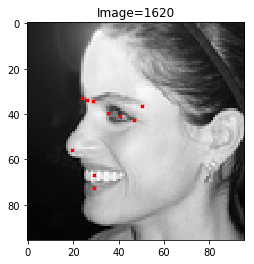

In [40]:
plt_sample(1620)

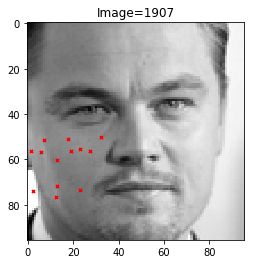

In [41]:
plt_sample(1907)

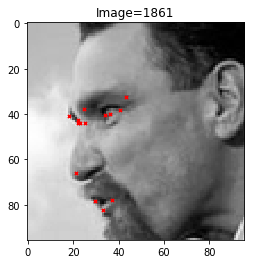

In [42]:
plt_sample(1861)

In [44]:
keypointColors = {}
"""keypointColors['left_eye_center'] = 'orange'
keypointColors['left_eye_inner_corner'] = 'green'
keypointColors['left_eye_outer_corner'] = 'blue' """
keypointColors['left_eyebrow_inner_end'] = 'brown'
keypointColors['left_eyebrow_outer_end'] = 'green'
"""
keypointColors['right_eye_center'] = 'green'
keypointColors['right_eye_inner_corner'] = 'lime'
keypointColors['right_eye_outer_corner'] = 'lime'
keypointColors['right_eyebrow_inner_end'] = 'chocolate'
keypointColors['right_eyebrow_outer_end'] = 'chocolate'

keypointColors['nose_tip'] = 'red'

keypointColors['mouth_left_corner']       = 'cyan'
keypointColors['mouth_right_corner']      = 'cyan'
keypointColors['mouth_center_top_lip']    = 'blue'
keypointColors['mouth_center_bottom_lip'] = 'blue'"""

"\nkeypointColors['right_eye_center'] = 'green'\nkeypointColors['right_eye_inner_corner'] = 'lime'\nkeypointColors['right_eye_outer_corner'] = 'lime'\nkeypointColors['right_eyebrow_inner_end'] = 'chocolate'\nkeypointColors['right_eyebrow_outer_end'] = 'chocolate'\n\nkeypointColors['nose_tip'] = 'red'\n\nkeypointColors['mouth_left_corner']       = 'cyan'\nkeypointColors['mouth_right_corner']      = 'cyan'\nkeypointColors['mouth_center_top_lip']    = 'blue'\nkeypointColors['mouth_center_bottom_lip'] = 'blue'"

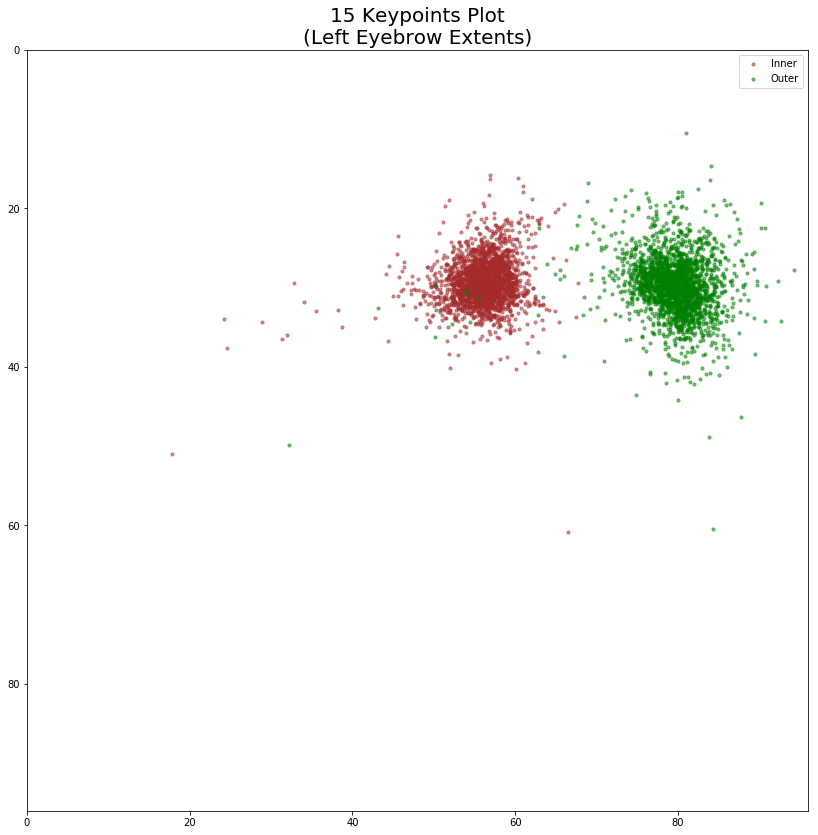

In [45]:
keypoint_present_inds = np.ones(num_images) == 1
for key in keypointColors.keys():
    keypoint_present_inds = keypoint_present_inds & (df.isnull()[key+'_x'] == False)
keypoint_present_inds = np.nonzero(keypoint_present_inds)[0]

plt.figure(figsize=(14,14))
for key,value in keypointColors.items():
    x_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_x'].tolist())
    y_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_y'].tolist())
    plt.scatter(x_feature_coords,y_feature_coords,c=value,s=10,alpha=0.5)
plt.xlim(0,96); plt.ylim(96,0)
plt.title('15 Keypoints Plot\n(Left Eyebrow Extents)', fontsize=20);
plt.legend(['Inner', 'Outer']);

In [47]:
check=df.loc[df.left_eyebrow_inner_end_x<25]

In [48]:
check

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
1861,36.165660,39.993905,23.196134,43.814740,34.140979,40.558028,40.609707,38.052049,25.041023,43.778630,...,21.358367,66.084898,37.145469,78.111347,NaN,NaN,29.675755,78.160980,33.162449,82.330122
1907,22.763345,55.617202,1.528527,56.404973,19.064954,56.291237,27.571879,56.384378,5.751046,56.743904,...,12.944699,60.069687,22.923362,73.483945,2.245766,74.128316,12.605173,71.888816,12.536477,76.628863
2191,41.035462,37.921889,12.779046,41.728168,32.982623,40.654298,48.630920,37.109719,18.194942,42.777340,...,20.514853,64.671134,47.655309,75.036473,20.800524,79.314024,28.806635,81.624359,28.852385,83.088334


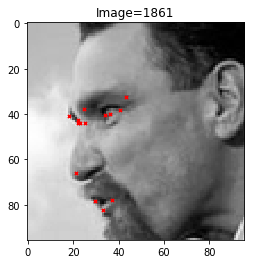

In [49]:
plt_sample(1861)

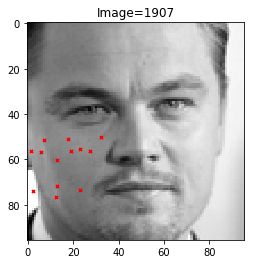

In [50]:
plt_sample(1907)

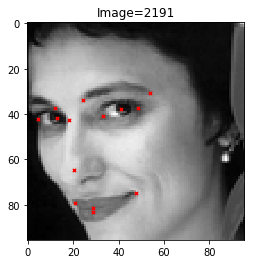

In [51]:
plt_sample(2191)

In [57]:
keypointColors = {}

keypointColors['right_eye_center'] = 'orange'
keypointColors['right_eye_inner_corner'] = 'green'
keypointColors['right_eye_outer_corner'] = 'blue'
keypointColors['right_eyebrow_inner_end'] = 'brown'
keypointColors['right_eyebrow_outer_end'] = 'black'


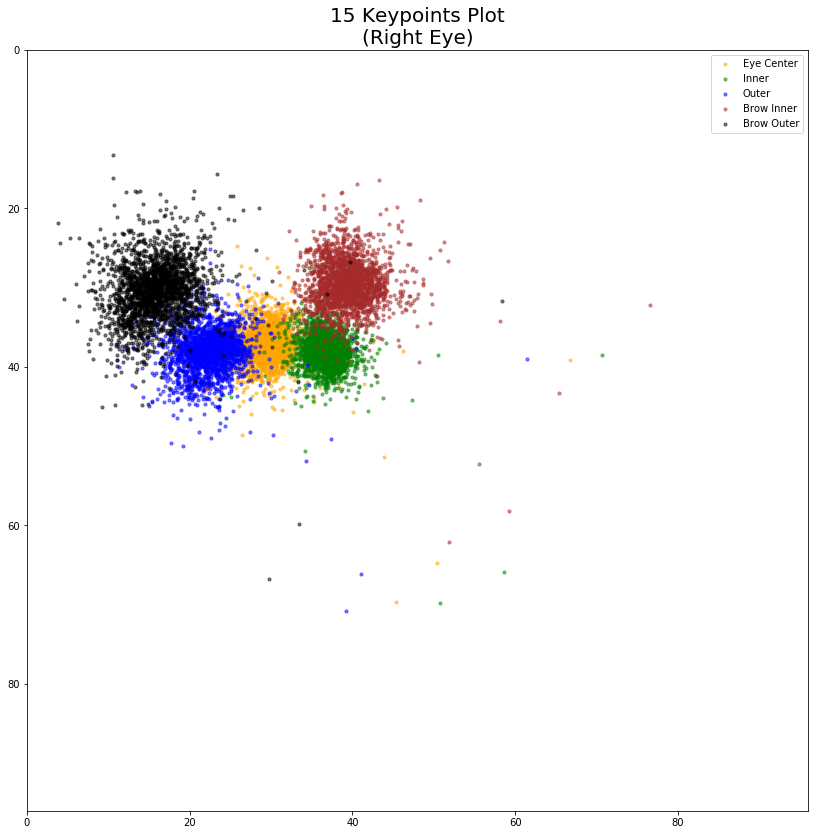

In [58]:
keypoint_present_inds = np.ones(num_images) == 1
for key in keypointColors.keys():
    keypoint_present_inds = keypoint_present_inds & (df.isnull()[key+'_x'] == False)
keypoint_present_inds = np.nonzero(keypoint_present_inds)[0]

plt.figure(figsize=(14,14))
for key,value in keypointColors.items():
    x_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_x'].tolist())
    y_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_y'].tolist())
    plt.scatter(x_feature_coords, y_feature_coords, c=value, s=10, alpha=0.5)
plt.xlim(0,96); plt.ylim(96,0)
plt.title('15 Keypoints Plot\n(Right Eye)', fontsize=20);
plt.legend(['Eye Center', 'Inner', 'Outer', 'Brow Inner', 'Brow Outer']);

In [27]:
keypointColors = {}

keypointColors['nose_tip'] = 'red'
keypointColors['mouth_left_corner']       = 'orange'
keypointColors['mouth_right_corner']      = 'cyan'
keypointColors['mouth_center_top_lip']    = 'blue'
keypointColors['mouth_center_bottom_lip'] = 'blue'

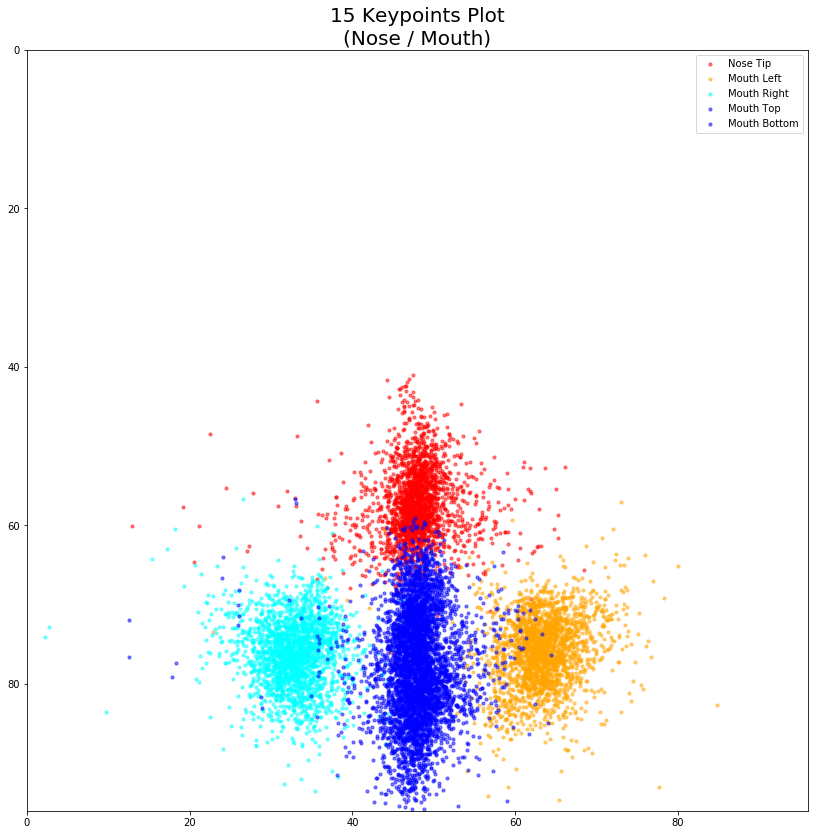

In [28]:
keypoint_present_inds = np.ones(num_images) == 1
for key in keypointColors.keys():
    keypoint_present_inds = keypoint_present_inds & (df.isnull()[key+'_x'] == False)
keypoint_present_inds = np.nonzero(keypoint_present_inds)[0]

plt.figure(figsize=(14,14))
for key,value in keypointColors.items():
    x_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_x'].tolist())
    y_feature_coords = np.array(df.loc[keypoint_present_inds,key+'_y'].tolist())
    plt.scatter(x_feature_coords, y_feature_coords, c=value, s=10, alpha=0.5)
plt.xlim(0,96); plt.ylim(96,0)
plt.title('15 Keypoints Plot\n(Nose / Mouth)', fontsize=20);
plt.legend(['Nose Tip','Mouth Left','Mouth Right','Mouth Top','Mouth Bottom']);

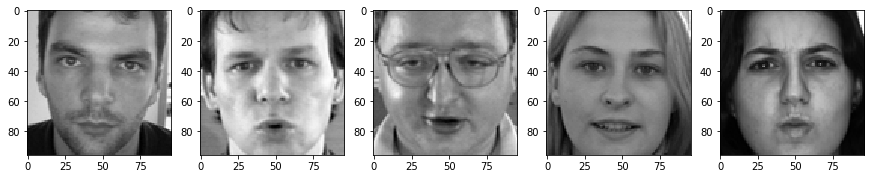

In [11]:
fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    img = X[i].reshape(96, 96)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

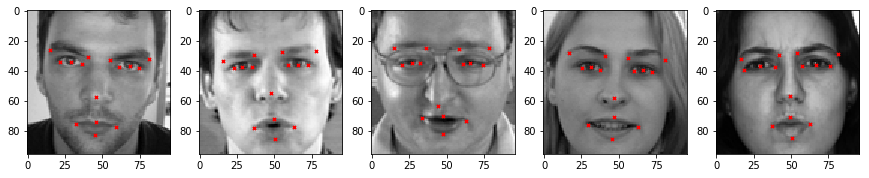

In [12]:
fig = plt.figure(figsize=(18, 18))

for i in range(1, 6):
    axis = fig.add_subplot(1, 6, i+1)
    plt_sample(i)
    #plt.scatter(y[i][0::2] * 48 + 48, y[i][1::2] * 48 + 48, marker='x', s=10, color='red')

plt.show()

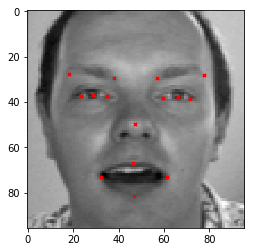

In [12]:
plt_sample(11)

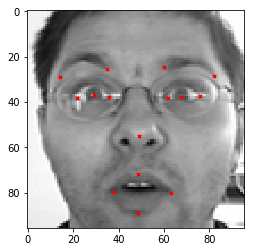

In [29]:
plt_sample(171)

In [13]:
import tensorflow as tf

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [15]:
model = Sequential()
model.add(Dense(100, input_dim=9216))
model.add(Activation('relu'))
model.add(Dense(30))

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
hist = model.fit(X, y, epochs=100, validation_split=0.2)

Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 2s - loss: 0.0803 - val_loss: 0.0141
Epoch 2/100
1712/1712 [==============================] - 0s - loss: 0.0127 - val_loss: 0.0129
Epoch 3/100
1712/1712 [==============================] - 0s - loss: 0.0111 - val_loss: 0.0106
Epoch 4/100
1712/1712 [==============================] - 0s - loss: 0.0101 - val_loss: 0.0097
Epoch 5/100
1712/1712 [==============================] - 0s - loss: 0.0094 - val_loss: 0.0117
Epoch 6/100
1712/1712 [==============================] - 0s - loss: 0.0088 - val_loss: 0.0087
Epoch 7/100
1712/1712 [==============================] - 0s - loss: 0.0086 - val_loss: 0.0087
Epoch 8/100
1712/1712 [==============================] - 0s - loss: 0.0079 - val_loss: 0.0101
Epoch 9/100
1712/1712 [==============================] - 0s - loss: 0.0077 - val_loss: 0.0078
Epoch 10/100
1712/1712 [==============================] - 0s - loss: 0.0075 - val_loss: 0.0077
Epoch 11/100

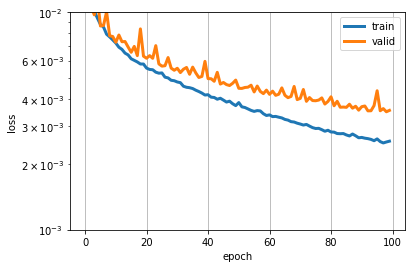

In [16]:
plt.plot(hist.history['loss'], linewidth=3, label='train')
plt.plot(hist.history['val_loss'], linewidth=3, label='valid')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(1e-3, 1e-2)
plt.yscale('log')
plt.show()

In [18]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10, color='yellow')

ImageId    1783
Image      1783
dtype: int64


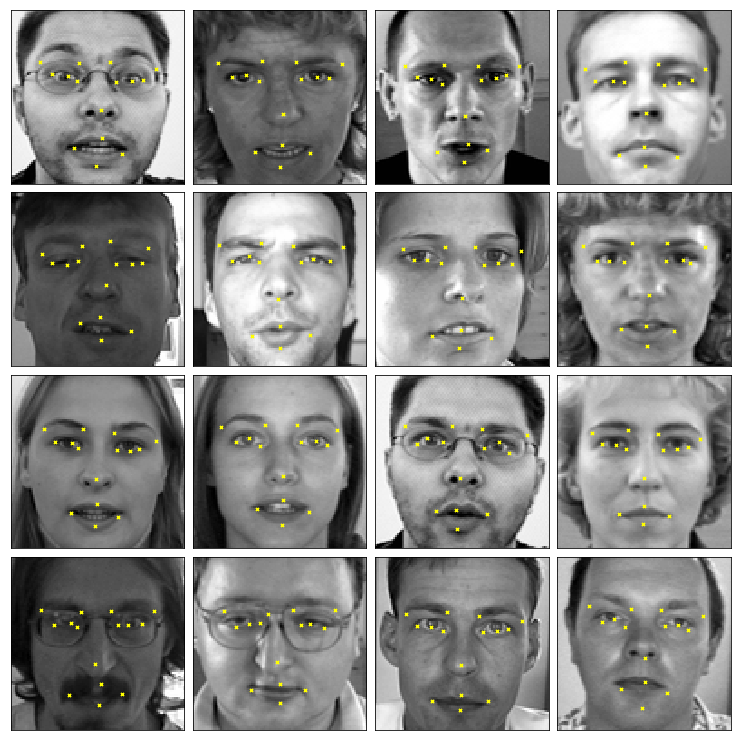

In [19]:
X_test, _ = load(test=True)
y_test = model.predict(X_test)

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_test[i], axis)

plt.show()